<a href="https://colab.research.google.com/github/DivyatejM/Algorithmic_Analysis_of_Social_Network/blob/main/radiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

data = pd.read_csv('/content/radiation.csv')


In [3]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [5]:
data.shape

(32686, 11)

In [6]:
data.describe

<bound method NDFrame.describe of          UNIXTime                   Data      Time  Radiation  Temperature  \
0      1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1      1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2      1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3      1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4      1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   
...           ...                    ...       ...        ...          ...   
32681  1480587604  12/1/2016 12:00:00 AM  00:20:04       1.22           44   
32682  1480587301  12/1/2016 12:00:00 AM  00:15:01       1.17           44   
32683  1480587001  12/1/2016 12:00:00 AM  00:10:01       1.20           44   
32684  1480586702  12/1/2016 12:00:00 AM  00:05:02       1.23           44   
32685  1480586402  12/1/2016 12:00:00 AM  00:00:02       1.20           44   

       Pressure  Humidity  Wi

In [9]:
data['Date'] = pd.to_datetime(data['Data']).dt.date.astype(str)
data['TimeSunRise'] = data['Date'] + ' ' + data['TimeSunRise']
data['TimeSunSet'] = data['Date'] + ' ' + data['TimeSunSet']
data['Date'] = data['Date'] + ' ' + data['Time']

data = data.sort_values('Date').reset_index(drop=True)
data.set_index('Date', inplace=True)
data.drop(['Data', 'Time', 'UNIXTime'], axis=1, inplace=True)
data.index = pd.to_datetime(data.index)
data.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
Date,,,,,,,,
2016-09-01 00:00:08,2.58,51,30.43,103,77.27,11.25,2016-09-01 06:07:00,2016-09-01 18:38:00
2016-09-01 00:05:10,2.83,51,30.43,103,153.44,9.00,2016-09-01 06:07:00,2016-09-01 18:38:00
2016-09-01 00:20:06,2.16,51,30.43,103,142.04,7.87,2016-09-01 06:07:00,2016-09-01 18:38:00
2016-09-01 00:25:05,2.21,51,30.43,103,144.12,18.00,2016-09-01 06:07:00,2016-09-01 18:38:00
2016-09-01 00:30:09,2.25,51,30.43,103,67.42,11.25,2016-09-01 06:07:00,2016-09-01 18:38:00


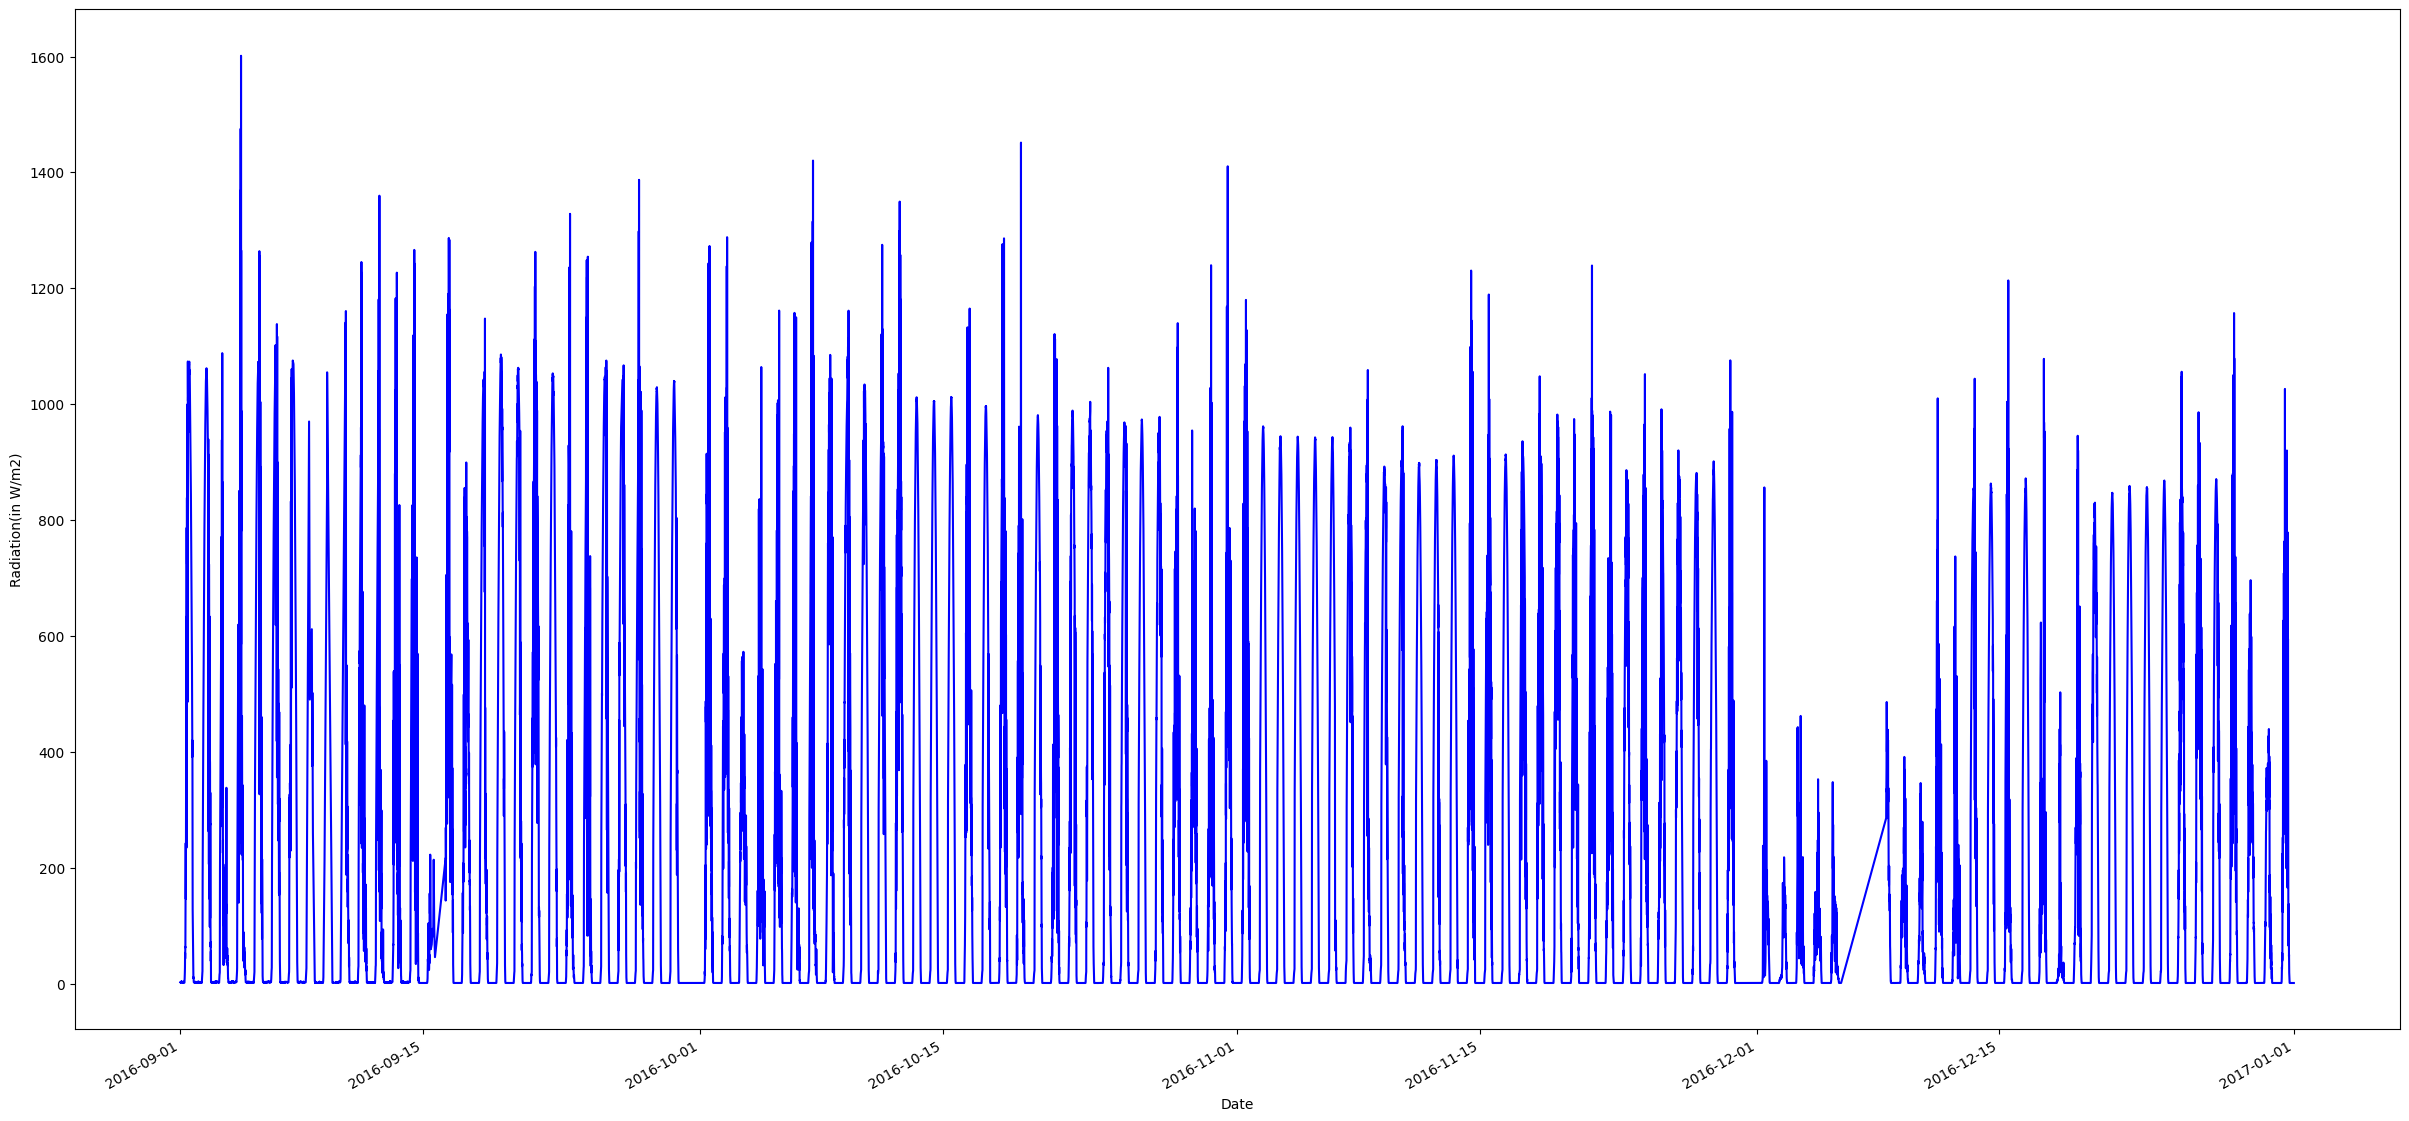

In [16]:
fig, ax = plt.subplots(figsize=(30, 15))
data['Radiation'].plot(ax=ax, color='blue')
# ax.set_title('Radiation as a Time Series', fontsize=18)
ax.set_ylabel('Radiation(in W/m2)')
plt.show()

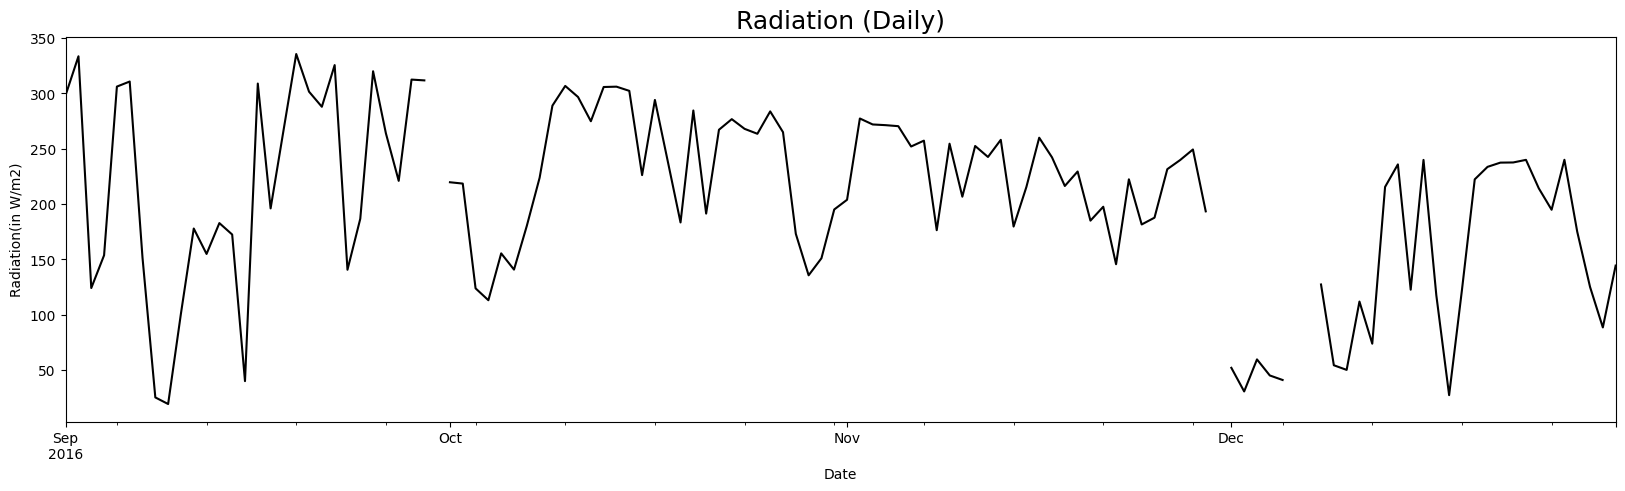

In [21]:
fig, ax = plt.subplots(figsize=(20, 5))
data.groupby(pd.Grouper(freq="D"))['Radiation'].mean().plot(ax=ax,color='black')
ax.set_title('Radiation (Daily)', fontsize=18)
ax.set_ylabel('Radiation(in W/m2)')
plt.show()

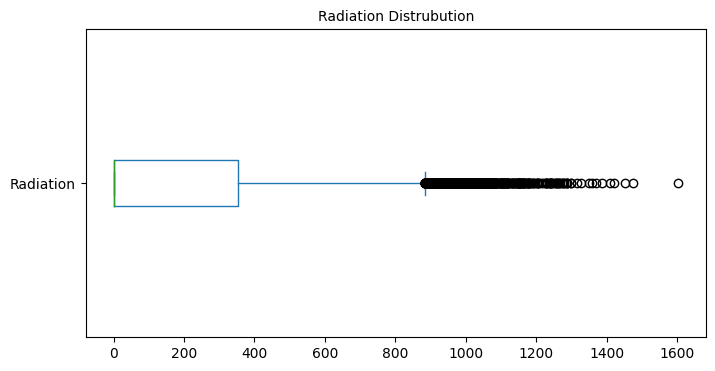

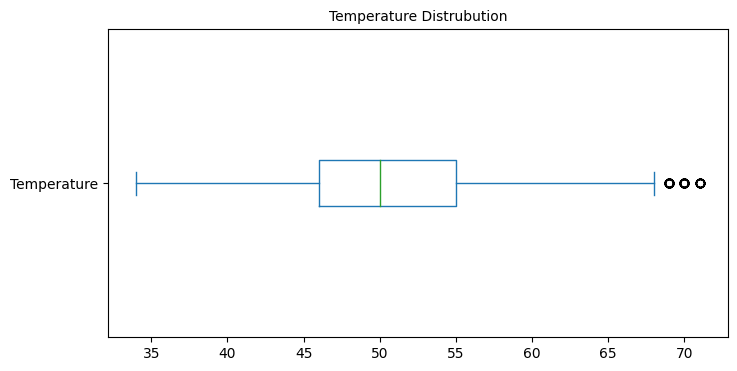

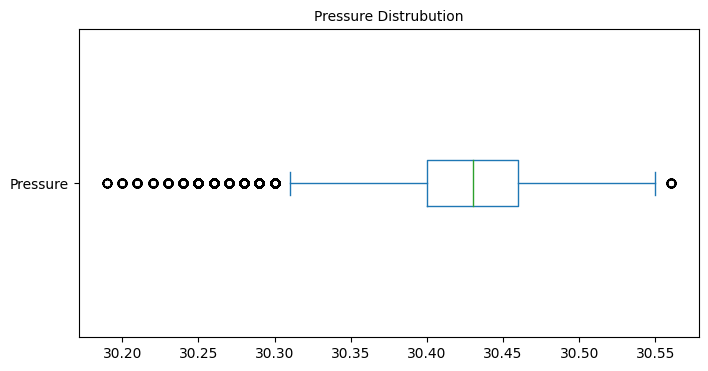

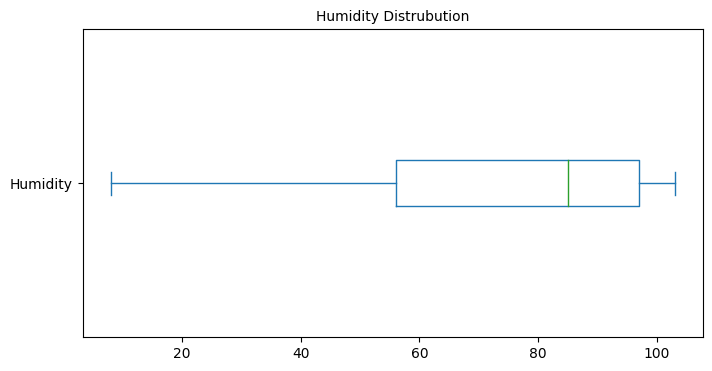

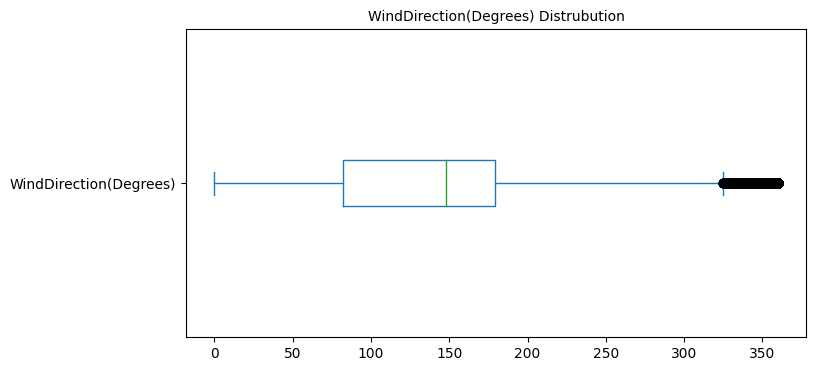

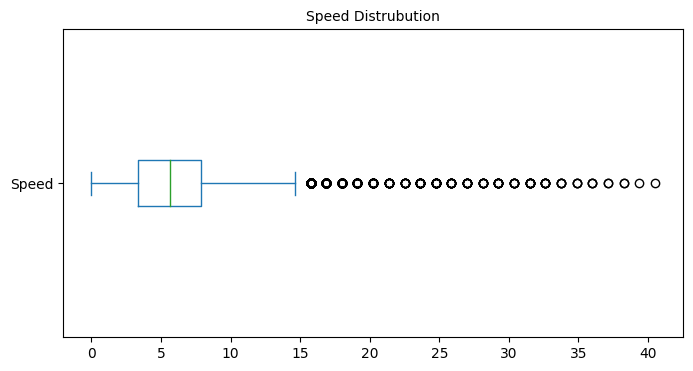

In [29]:
for col in ['Radiation','Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']:
    fig, ax = plt.subplots(figsize=(8, 4))
    data[col].plot.box(ax=ax, vert=False)
    ax.set_title(f'{col} Distrubution', fontsize=10)
    plt.show()

<ipython-input-30-5e7255c2fc5c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, center=0)


<Axes: >

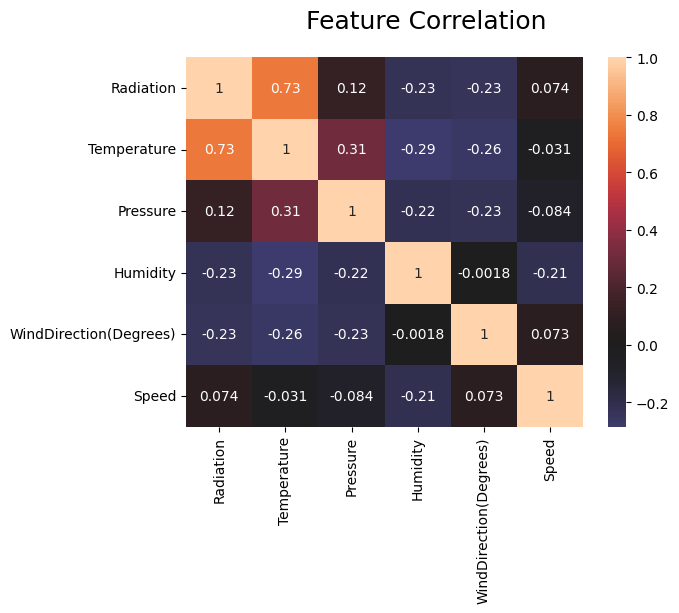

In [30]:
fig = plt.figure()
fig.suptitle('Feature Correlation', fontsize=18)
sns.heatmap(data.corr(), annot=True, center=0)

In [31]:
def total(series):
    return series.hour*60*60 + series.minute*60 + series.second

In [32]:
data['MonthOfYear'] = data.index.strftime('%m').astype(int)
data['DayOfYear'] = data.index.strftime('%j').astype(int)
data['WeekOfYear'] = data.index.strftime('%U').astype(int)
data['TimeOfDay(h)'] = data.index.hour
data['TimeOfDay(m)'] = data.index.hour*60 + data.index.minute
data['TimeOfDay(s)'] = total(data.index)
data['TimeSunRise'] = pd.to_datetime(data['TimeSunRise'])
data['TimeSunSet'] = pd.to_datetime(data['TimeSunSet'])
data['DayLength(s)'] = total(data['TimeSunSet'].dt) - total(data['TimeSunRise'].dt)
data['TimeAfterSunRise(s)'] = total(data.index) - total(data['TimeSunRise'].dt)
data['TimeBeforeSunSet(s)'] = total(data['TimeSunSet'].dt) - total(data.index)
data['RelativeTOD'] = data['TimeAfterSunRise(s)'] / data['DayLength(s)']
data.drop(['TimeSunRise','TimeSunSet'], inplace=True, axis=1)


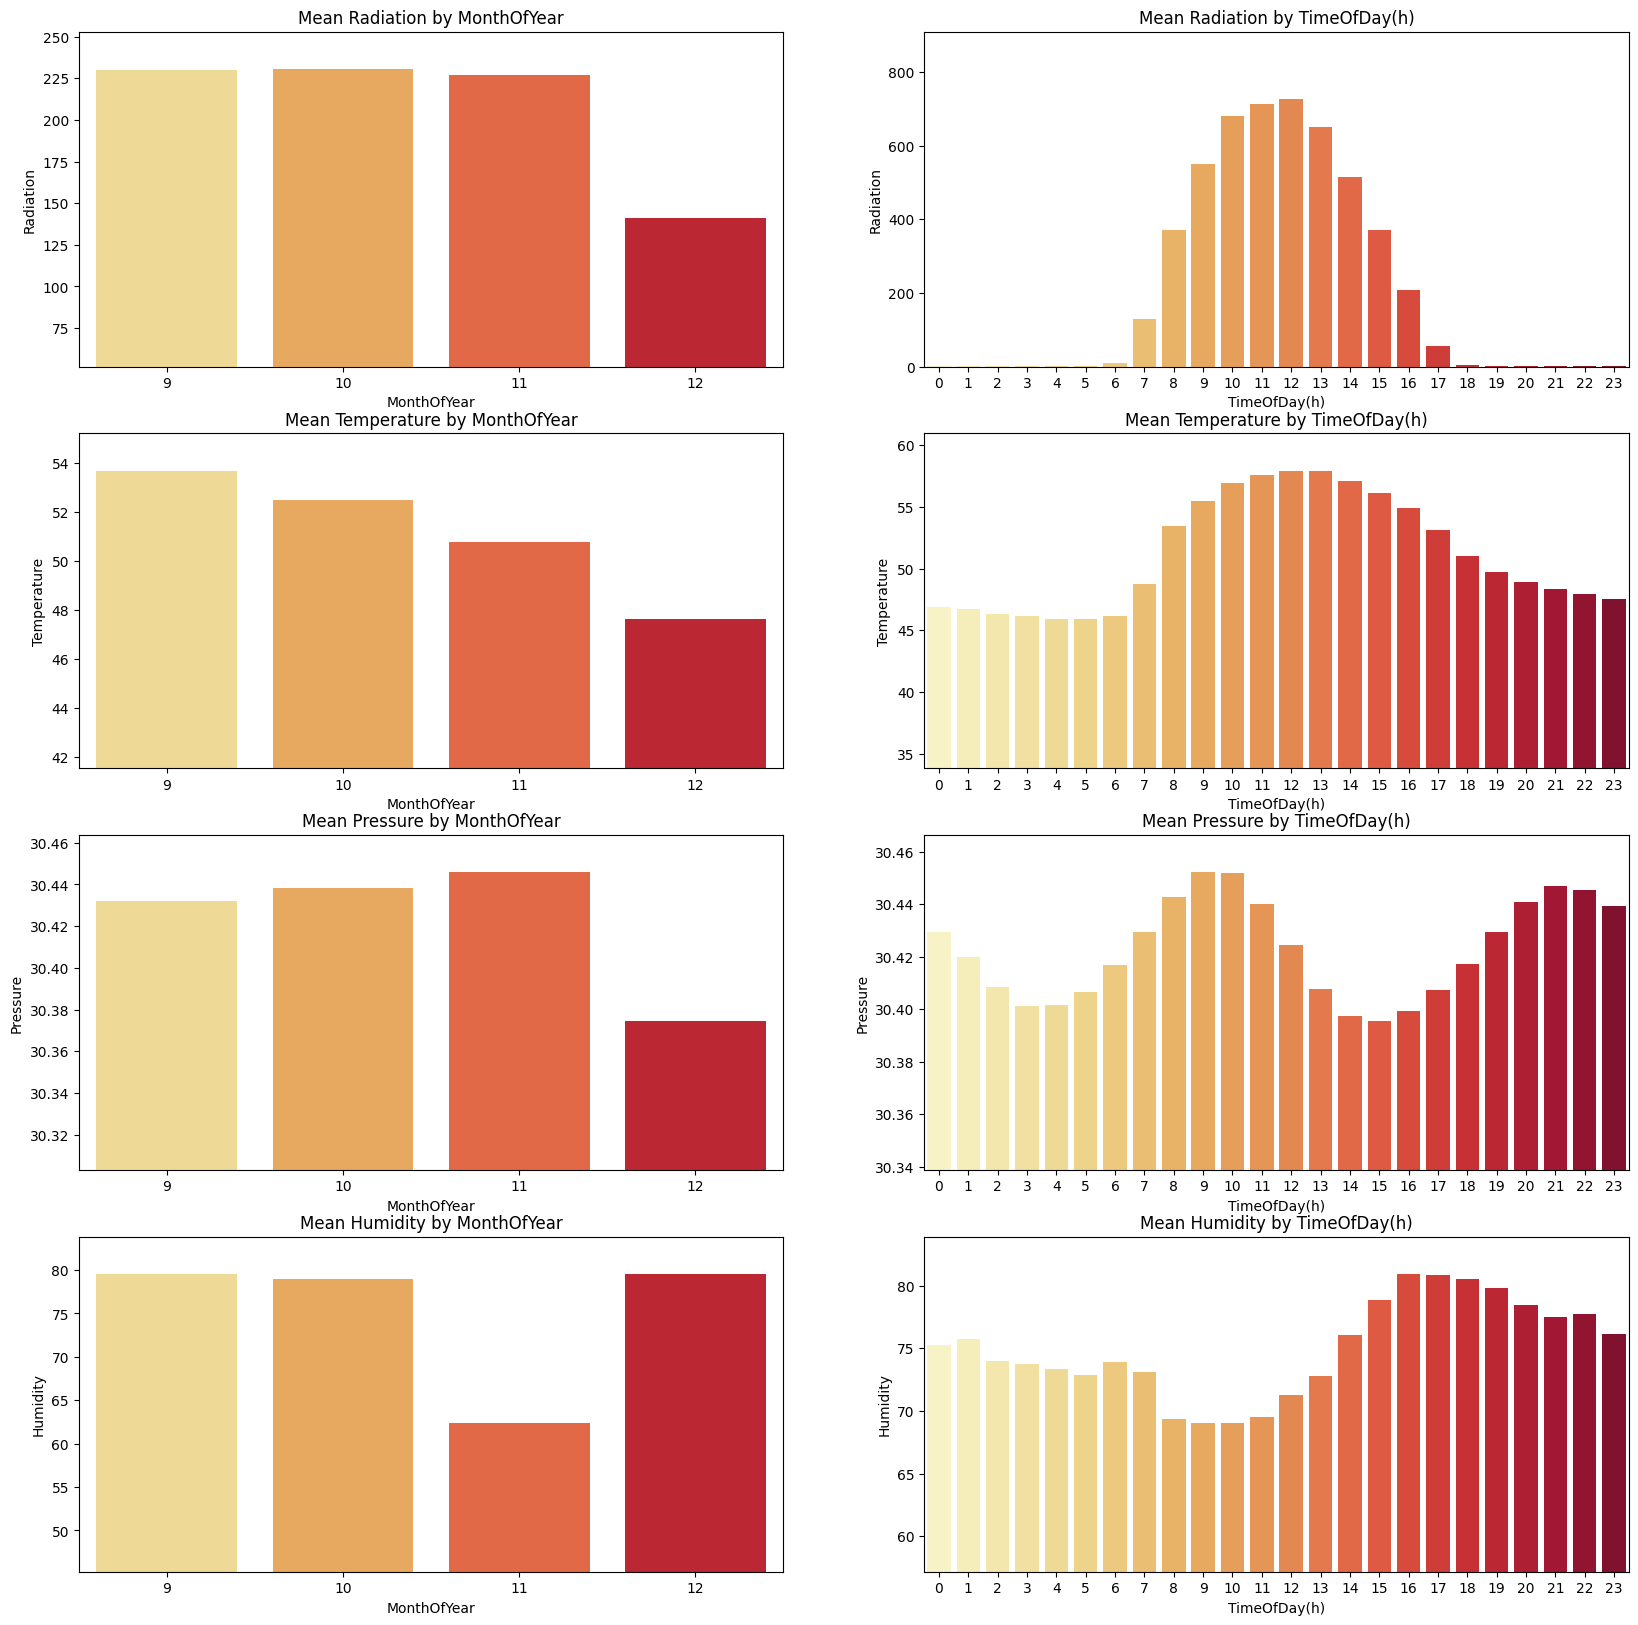

In [34]:
fig, ax = plt.subplots(4, 2, figsize=(20, 20))
for j, timeunit in enumerate(['MonthOfYear', 'TimeOfDay(h)']):
    grouped_data=data.groupby(timeunit).mean().reset_index()
    palette = sns.color_palette("YlOrRd", len(grouped_data))
    for i, col in enumerate(['Radiation', 'Temperature', 'Pressure', 'Humidity']):
        sns.barplot(data=grouped_data, x=timeunit, y=col, ax=ax[i][j], palette=palette)
        ax[i][j].set_title(f'Mean {col} by {timeunit}', fontsize=12)
        range_values = grouped_data[col].max() - grouped_data[col].min()
        ax[i][j].set_ylim(max(grouped_data[col].min() - range_values, 0), grouped_data[col].max() + 0.25*range_values)


<Axes: >

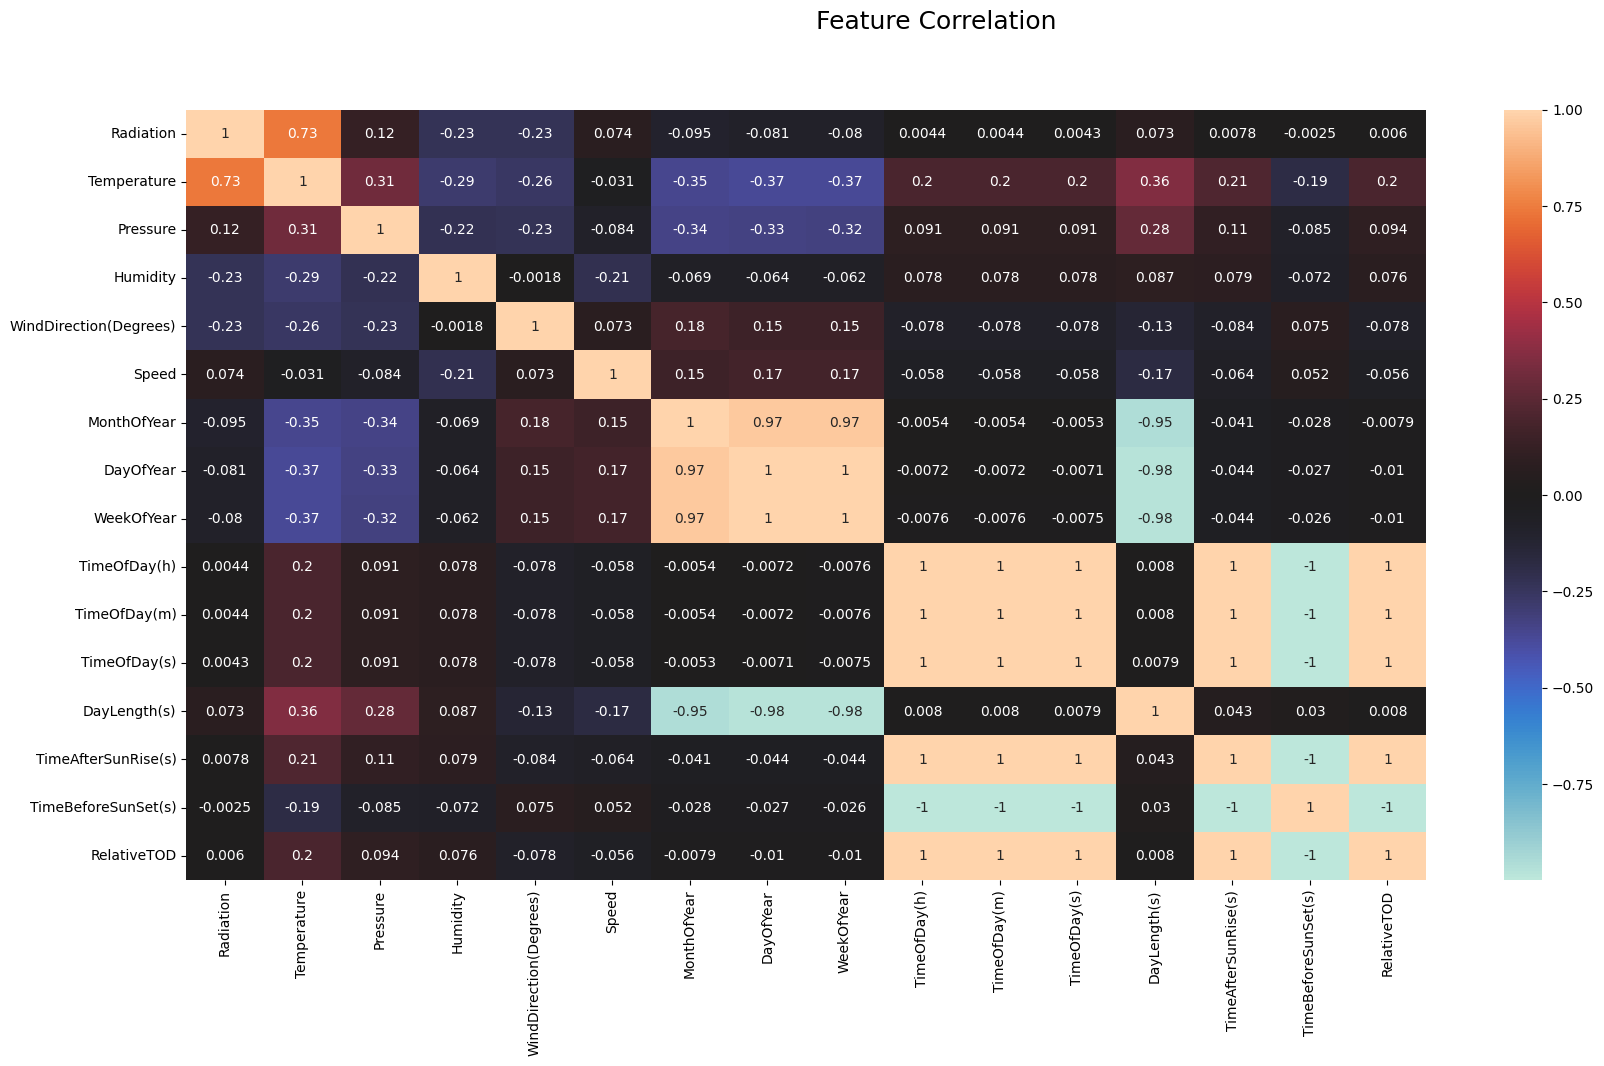

In [35]:
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Feature Correlation', fontsize=18)
sns.heatmap(data.corr(), annot=True, center=0)

In [39]:
feats = ['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed','MonthOfYear','DayOfYear', 'RelativeTOD']
X = data[feats].values
y = data['Radiation'].values

print(X.shape)

(32686, 8)


In [40]:
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
kf = KFold(shuffle=True, random_state=20)

In [41]:
scores = []
rmse = []
mae = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = DummyRegressor(strategy='mean').fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    rmse.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
    mae.append(mean_absolute_error(y_test, model.predict(X_test)))
    
print('Mean R2 Score:', round(np.mean(scores), 5))
print('Mean RMSE:', round(np.mean(rmse), 5))
print('Mean MAE:', round(np.mean(mae), 5))

Mean R2 Score: -0.00016
Mean RMSE: 315.91008
Mean MAE: 259.04744


In [42]:
scores = []
rmse = []
mae = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    dtmodel = DecisionTreeRegressor(random_state=19).fit(X_train, y_train)
    scores.append(dtmodel.score(X_test, y_test))
    rmse.append(np.sqrt(mean_squared_error(y_test, dtmodel.predict(X_test))))
    mae.append(mean_absolute_error(y_test, dtmodel.predict(X_test)))
    
print('Mean R2 Score:', round(np.mean(scores), 5))
print('Mean RMSE:', round(np.mean(rmse), 5))
print('Mean MAE:', round(np.mean(mae), 5))


Mean R2 Score: 0.87523
Mean RMSE: 111.56036
Mean MAE: 39.00335


In [44]:
!pip install catboost
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from catboost import CatBoostRegressor

trees = {
    'RandomForest': RandomForestRegressor(random_state=20), 'ExtraTrees': ExtraTreesRegressor(random_state=20),
    'GradientBoosting': GradientBoostingRegressor(random_state=20), 'LightGBM': LGBMRegressor(random_state=20),
    'XGBoost': XGBRegressor(random_state=20), 'XGBoostRF': XGBRFRegressor(random_state=20), 
    'CatBoost': CatBoostRegressor(random_state=20, silent=True)
}

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.6 MB/s eta 0:00:00


In [46]:
performance = {'rmse':[], '100*r2':[], 'mae':[]}
for name, model in trees.items():
    scores = []
    rmse = []
    mae = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = model.fit(X_train, y_train)
        scores.append(100*model.score(X_test, y_test))
        rmse.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
        mae.append(mean_absolute_error(y_test, model.predict(X_test)))
    performance['100*r2'].append(np.mean(scores))
    performance['rmse'].append(np.mean(rmse))
    performance['mae'].append(np.mean(mae))

In [47]:
fig = px.bar(pd.DataFrame(performance, index=trees.keys()), barmode='group', title='Model Comparison')
fig.show()

<Axes: >

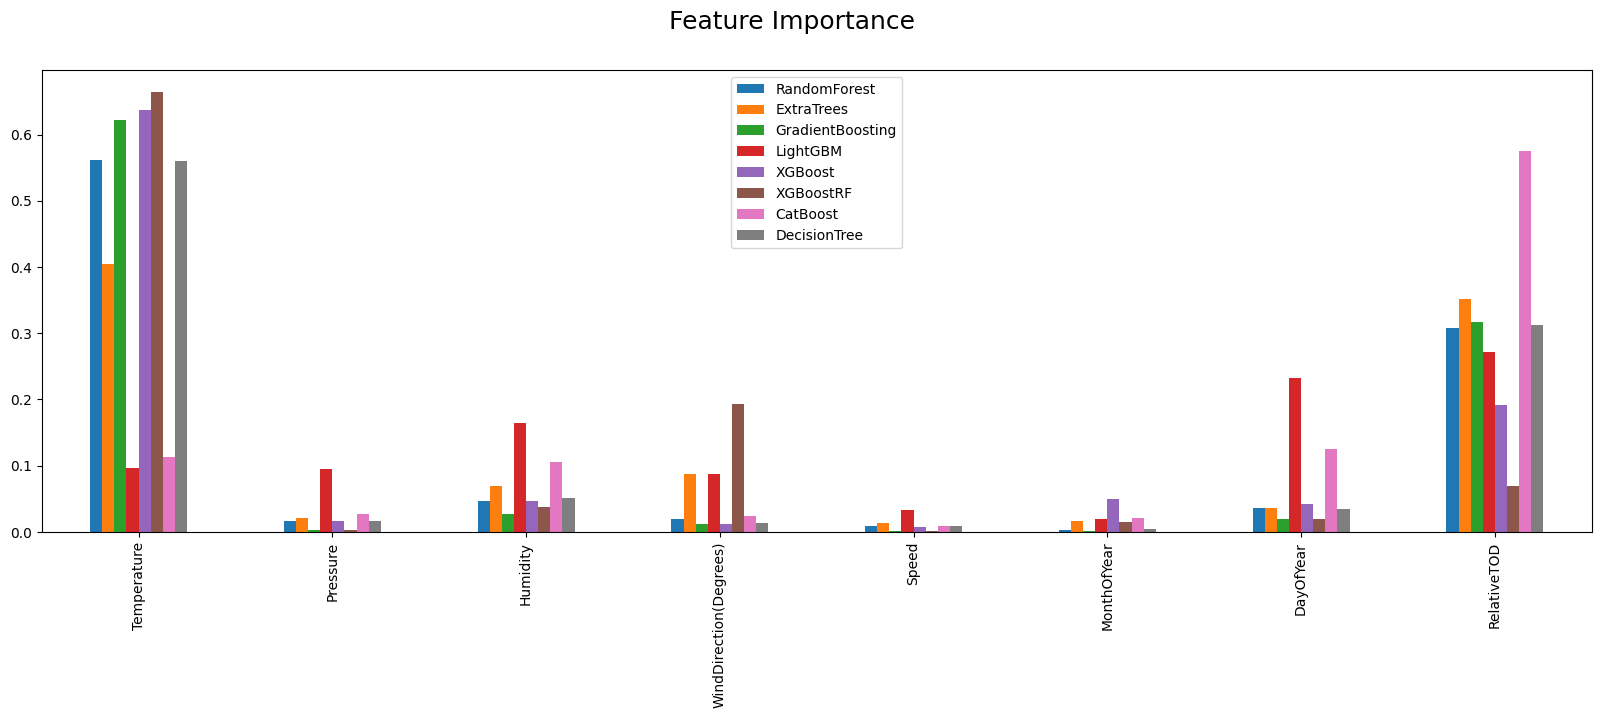

In [49]:
feat_imp = {k: trees[k].feature_importances_ for k, v in trees.items()}
feat_imp['DecisionTree'] = dtmodel.feature_importances_
feat_imp = pd.DataFrame(feat_imp)

feat_imp /= feat_imp.sum()
feat_imp.index = feats

fig, ax= plt.subplots(figsize=(20, 6))
fig.suptitle('Feature Importance', fontsize=18)
pd.DataFrame(feat_imp).plot.bar(ax=ax)